[Как работают рекомендательные системы. Лекция в Яндексе](https://habr.com/ru/company/yandex/blog/241455/)


Пусть дана матрица оценок $\mathbf{R} \in \mathbb{R}^{m \times n}$, для которой известны значения лишь подмножества ее элементов
$\Omega \subset \{(i,j)|1 \leq i \leq m, 1 \leq j \leq n \}$.

Идея заключается в том, чтобы аппроксимировать $\mathbf{R}$ матрицей низкого ранга.

__Сингулярное разложение__

Сингулярное разложение (Singular Value Decomposition, SVD) — декомпозиция вещественной  или комплексной прямоугольной матрицы с целью ее приведения к каноническому виду. Сингулярное разложение показывает геометрическую структуру матрицы и позволяет наглядно представить имеющиеся данные. Сингулярное разложение используется при решении самых разных задач — от приближения методом наименьших квадратов и решения систем уравнений до сжатия изображений. 

<img src="https://openi.nlm.nih.gov/imgs/512/77/3092990/PMC3092990_hir-17-24-g001.png">

_Сингулярным разложением_ матрицы $\mathbf{A}$ является разложение следующего вида
$$ \mathbf{A} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T $$

где $\mathbf{\Sigma}$  — матрица с неотрицательными элементами, у которой элементы, лежащие на главной диагонали - это _сингулярные числа_ (а все элементы, не лежащие на главной диагонали, являются нулевыми), а матрицы $\mathbf{U}$  и $\mathbf{V}$ - это две унитарные матрицы, состоящие из левых и правых _сингулярных векторов_ соответственно.

Векторы $\mathbf{u}_i$ и $\mathbf{v}_i$ называются, соответственно, левым сингулярным вектором и правым сингулярным вектором, соответствующим сингулярному числу $\sigma_i$:

$\mathbf{A} \mathbf{v}_i = \sigma_i \mathbf{u}_i$

$\mathbf{A}^T \mathbf{u}_i = \sigma_i \mathbf{v}_i$

__Теорема Эккарта-Янга__

Пусть заданную матрицу $\mathbf{R} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T$ требуется приблизить некоторой другой матрицей $\mathbf{X}$ тех же размеров, но меньшего ранга $k$. Тогда

$$\arg\min_{\mathrm{rank}(X)=k} {\lVert \mathbf{R} - \mathbf{X}  \rVert}^2_F = \mathbf{U}_k \mathbf{\Sigma}_k \mathbf{V}_k^T = \sum_{i=1}^k {\sigma_i \mathbf{u}_i \mathbf{v}_i^T}$$

где $\mathbf{\Sigma}_k$ - диагональная матрица, содержащая $k$ максимальных сингулярных чисел матрицы $\mathbf{R}$ на главной диагонали, $\mathbf{U}_k$ и $\mathbf{V}_k$ - матрицы, состоящие из $k$ столбцов - сингулярных векторов, отвечающих старшим сингулярным числам.

Альтернативная формулировка задачи - представитиь искомую матрицу как произведение матриц низкого ранга:

$$\mathbf{R} \approx \mathbf{P}^T \mathbf{Q}$$

Найти такие матрицы можно минимизируя невязку (ошибку аппроксимации) для множества наблюдаемых элементов $\Omega$:

$$\min_{\mathbf{P}, \mathbf{Q}} \frac{1}{2}\sum_{(i,j) \in \Omega} (r_{ij} - \mathbf{p}_i^T \mathbf{q}_j)^2 $$

или

$$ \min_{\mathbf{P}, \mathbf{Q}} \frac{1}{2} {\lVert \mathcal{P}_{\Omega}(\mathbf{R}) -  \mathcal{P}_{\Omega}(\mathbf{P}^T \mathbf{Q}) \rVert}^2_F $$

где $\mathcal{P}_{\Omega}(\mathbf{R})$ обнуляет все элементы матрицы $\mathbf{R}$, не принадлежащие множеству $\Omega$.

[Метод покоординатного спуска](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BF%D0%BE%D0%BA%D0%BE%D0%BE%D1%80%D0%B4%D0%B8%D0%BD%D0%B0%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D1%81%D0%BF%D1%83%D1%81%D0%BA%D0%B0)

<img src="http://danielnee.com/wp-content/uploads/2015/04/Matrix-Factorisation-1.png">

<img src="http://kevinkolcheck.com/wp-content/uploads/2017/12/mf-min.png" width=500>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.sparse import coo_matrix

In [2]:
from surprise import Dataset
from surprise.model_selection import train_test_split

In [3]:
# Load the movielens-100k dataset (download it if needed).
data_ml_100k = Dataset.load_builtin('ml-100k')

In [69]:
trainset, testset = train_test_split(data_ml_100k, test_size=.25)

Реализация из библиотеки [Surprise](http://surpriselib.com/)

In [70]:
from surprise import SVD
from surprise import accuracy

algo = SVD(n_factors=100, biased=False)

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)

predictions = algo.test(testset)

Оценка качества прогнозов: root-mean-square error (RMSE)

<img src="https://cdn-images-1.medium.com/max/1600/1*9hQVcasuwx5ddq_s3MFCyw.gif">

In [71]:
# Compute RMSE
RMSE = accuracy.rmse(predictions)
print('Test RMSE:', RMSE)

RMSE: 0.9496
Test RMSE: 0.949568505755803


Преобразование обучающих данных в разреженную матрицу в формате [coo](http://scipy-lectures.org/advanced/scipy_sparse/coo_matrix.html).

In [72]:
n = trainset.n_ratings

data = np.zeros((n,))
row = np.zeros((n,))
col = np.zeros((n,))

idx = 0    
for user, item, rating in trainset.all_ratings(): 
    data[idx] = rating
    row[idx] = user
    col[idx] = item
    idx += 1

R_ml_100k_train = coo_matrix((data, (row,col)), shape=(trainset.n_users, trainset.n_items))        


In [73]:
print(R_ml_100k_train.shape)

(943, 1643)


In [74]:
print(R_ml_100k_train.nnz)

75000


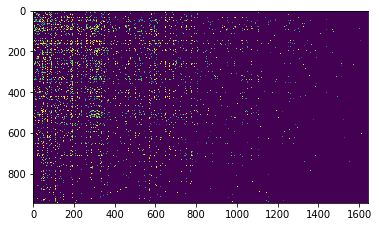

In [75]:
plt.imshow(R_ml_100k_train.todense())
plt.show()

Преобразование тестовых данных в разреженную матрицу.

In [76]:
n = len(testset)

data = []
row = []
col = []

for user, item, rating in testset:
    try:
        user, item = trainset.to_inner_uid(user), trainset.to_inner_iid(item)
    except:
        continue
    data.append(rating)
    row.append(user)
    col.append(item)
    
R_ml_100k_test = coo_matrix((data, (row,col)), shape=(trainset.n_users, trainset.n_items))


In [77]:
print(R_ml_100k_test.shape)

(943, 1643)


In [78]:
print(R_ml_100k_test.nnz)

24955


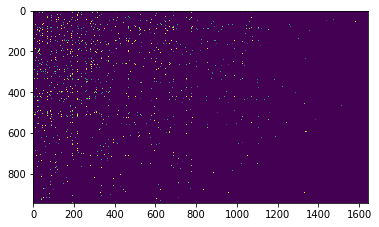

In [79]:
plt.imshow(R_ml_100k_test.todense())
plt.show()

In [80]:
def als(R, n_factors=100, lmbda=0.05, max_iter=50):
    
    row = R.row
    col = R.col
    ratings = R.data
    
    M,N = R.shape
    
    U = np.random.rand(n_factors, M)
    V = np.random.rand(n_factors, N)
    
    I = np.eye(n_factors)
    
    for iteration in range(max_iter):
        
        for i in range(M):
            idx_nonzero = col[row==i]
            vv = V[:,idx_nonzero]        
            A = np.dot(vv, vv.T) + lmbda*I
            b = np.dot(vv, ratings[row==i])
            #U[:,i] = np.linalg.inv(A).dot(b)
            U[:,i] = np.linalg.solve(A,b)
        
        for j in range(N):
            idx_nonzero = row[col==j]
            uu = U[:,idx_nonzero] 
            A = np.dot(uu, uu.T) + lmbda*I
            b = np.dot(uu, ratings[col==j])
            #V[:,j] = np.linalg.inv(A).dot(b)
            V[:,j] = np.linalg.solve(A,b)
        
        if iteration % 10 == 0:

            R_hat = np.dot(U.T, V)
            ratings_hat = R_hat[row,col]
            
            RMSE = np.sqrt(np.mean((ratings - ratings_hat)**2))
            print('Iteration: %i, Train RMSE: %0.6f' % (iteration, RMSE))
            
    return np.dot(U.T, V)


In [81]:
K = 200
R_predicted = als(R_ml_100k_train, K, 0.8)

Iteration: 0, Train RMSE: 0.212083
Iteration: 10, Train RMSE: 0.076363
Iteration: 20, Train RMSE: 0.066831
Iteration: 30, Train RMSE: 0.064188
Iteration: 40, Train RMSE: 0.063017


In [82]:
row_test = R_ml_100k_test.row
col_test = R_ml_100k_test.col

ratings_test = R_ml_100k_test.data

ratings_predicted = R_predicted[row_test,col_test]

RMSE = np.sqrt(np.mean((ratings_predicted - ratings_test)**2))
print('Test RMSE:', RMSE)

Test RMSE: 1.0063693080396987
